In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telecomdata = pd.read_csv('telecom_churn_data.csv')

In [4]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300
telecomdata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
telecomdata.shape

(99999, 226)

In [6]:
telecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecomdata.nunique().sort_values()

std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_9                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
std_ic_t2o_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
last_date_of_month_7            1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_8            1
last_date_of_month_6            1
night_pck_user_7                2
night_pck_user_8                2
night_pck_user_9                2
night_pck_user_6                2
fb_user_9                       2
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

In [8]:
#Removing all columns with just one unique value as this does not help analysis
for col in telecomdata.columns:
    if (telecomdata[col].nunique()) == 1:
        telecomdata.drop(col,inplace=True,axis=1)

In [9]:
#Meaningful missing values in the cases of the columns given below, have been imputed with 0. 
#There are only two unique values for fb_user and night pck user, so np.nan has been replaced with 0
telecomdata['fb_user_9']= telecomdata['fb_user_9'].replace(np.nan, 0)
telecomdata['fb_user_8']= telecomdata['fb_user_8'].replace(np.nan, 0)
telecomdata['fb_user_7']= telecomdata['fb_user_7'].replace(np.nan, 0)
telecomdata['fb_user_6']= telecomdata['fb_user_6'].replace(np.nan, 0)
telecomdata['night_pck_user_9']= telecomdata['night_pck_user_9'].replace(np.nan, 0)
telecomdata['night_pck_user_8']= telecomdata['night_pck_user_8'].replace(np.nan, 0)
telecomdata['night_pck_user_7']= telecomdata['night_pck_user_7'].replace(np.nan, 0)
telecomdata['night_pck_user_6']= telecomdata['night_pck_user_6'].replace(np.nan, 0)

In [10]:
#Changed the variables to object type as they are categorical in nature
telecomdata['fb_user_9']= telecomdata['fb_user_9'].astype('object')
telecomdata['fb_user_8']= telecomdata['fb_user_8'].astype('object')
telecomdata['fb_user_7']= telecomdata['fb_user_7'].astype('object')
telecomdata['fb_user_6']= telecomdata['fb_user_6'].astype('object')
telecomdata['night_pck_user_9']= telecomdata['night_pck_user_9'].astype('object')
telecomdata['night_pck_user_8']= telecomdata['night_pck_user_8'].astype('object')
telecomdata['night_pck_user_7']= telecomdata['night_pck_user_7'].astype('object')
telecomdata['night_pck_user_6']= telecomdata['night_pck_user_6'].astype('object')

In [11]:
#Night pck user 6,7,8,9 has a highly skewed distribution of values, and is categorical, hence they are being dropped. 
#Given below is an example of the skewness seen in night pck user 6
#fb user is retained as there is not as much skewness
telecomdata['night_pck_user_6'].value_counts(normalize = True)

0.0    0.99369
1.0    0.00631
Name: night_pck_user_6, dtype: float64

In [12]:
telecomdata.drop(columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9'], axis = 1, inplace = True)

In [13]:
#Date type variables will be removed as they are not needed.
telecomdata.drop(columns = ['date_of_last_rech_data_9', 'date_of_last_rech_data_8', 'date_of_last_rech_data_7', 'date_of_last_rech_data_6',
'date_of_last_rech_9', 'date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6'], axis = 1, inplace = True)

In [14]:
#Calculating percentage missing for every column and storing the result in a dataframe format.
percentagemissingvalues = pd.DataFrame(round(((telecomdata.isnull().sum())/telecomdata.shape[0])*100,2))
percentagemissingvalues.rename(columns = {0:'Missing Percentage'}, inplace = True)

In [15]:
#Viewing in list format the variables for which percentage missing is greater than 50% in the dataset
percentagemissingvalues[percentagemissingvalues['Missing Percentage'] > 50].index.to_list() 

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [16]:
#Nan values in ARPU 3g and 2g are missing at random, and it would be best not to impute. As the missing values are also >50%,they have been dropped.
telecomdata.drop(columns = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',  'arpu_3g_9',  'arpu_2g_6',  'arpu_2g_7',  'arpu_2g_8',
 'arpu_2g_9'], axis = 1, inplace = True)

In [17]:
telecomdata.dtypes

mobile_number           int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2f_mou_9      float64
loc_og_t2c

In [18]:
telecomdata.select_dtypes(include = 'int64').columns.to_list

<bound method IndexOpsMixin.tolist of Index(['mobile_number', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')>

In [19]:
telecomdata['mobile_number'] = telecomdata['mobile_number'].astype('object')

In [20]:
telecomdata.select_dtypes(include = 'object').columns.to_list

<bound method IndexOpsMixin.tolist of Index(['mobile_number', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], dtype='object')>

In [21]:
telecomdata.select_dtypes(include = 'float64').columns.to_list

<bound method IndexOpsMixin.tolist of Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=152)>

The remaining missing values in the columns are meaningful, so they will be imputed with the constant 0.

In [22]:
#Importing simple imputer for imputation
from sklearn.impute import SimpleImputer

In [23]:
#Initializing Simple Imputer to apply constant value of 0 
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)

In [24]:
#Applying Simple imputer with 0 on all variable columns having missing values, reassigning the telecomdata datframe to this result
telecomdata = pd.DataFrame(imp.fit_transform(telecomdata),columns=telecomdata.columns,
                   index=telecomdata.index)

In [25]:
telecomdata[['total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon']] = telecomdata[['total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon']].apply(pd.to_numeric) 

In [26]:
telecomdata.dtypes

mobile_number         object
arpu_6                object
arpu_7                object
arpu_8                object
arpu_9                object
onnet_mou_6           object
onnet_mou_7           object
onnet_mou_8           object
onnet_mou_9           object
offnet_mou_6          object
offnet_mou_7          object
offnet_mou_8          object
offnet_mou_9          object
roam_ic_mou_6         object
roam_ic_mou_7         object
roam_ic_mou_8         object
roam_ic_mou_9         object
roam_og_mou_6         object
roam_og_mou_7         object
roam_og_mou_8         object
roam_og_mou_9         object
loc_og_t2t_mou_6      object
loc_og_t2t_mou_7      object
loc_og_t2t_mou_8      object
loc_og_t2t_mou_9      object
loc_og_t2m_mou_6      object
loc_og_t2m_mou_7      object
loc_og_t2m_mou_8      object
loc_og_t2m_mou_9      object
loc_og_t2f_mou_6      object
loc_og_t2f_mou_7      object
loc_og_t2f_mou_8      object
loc_og_t2f_mou_9      object
loc_og_t2c_mou_6      object
loc_og_t2c_mou

In [27]:
telecomdata[['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
            'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',       
'roam_ic_mou_7',         
'roam_ic_mou_8',         
'roam_ic_mou_9',       
'roam_og_mou_6',        
'roam_og_mou_7',        
'roam_og_mou_8',      
'roam_og_mou_9',         
'loc_og_t2t_mou_6',      
'loc_og_t2t_mou_7',      
'loc_og_t2t_mou_8',     
'loc_og_t2t_mou_9',      
'loc_og_t2m_mou_6',     
'loc_og_t2m_mou_7',      
'loc_og_t2m_mou_8',     
'loc_og_t2m_mou_9', 
'loc_og_t2f_mou_6',     
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',     
'loc_og_t2f_mou_9',     
'loc_og_t2c_mou_6',     
'loc_og_t2c_mou_7',     
'loc_og_t2c_mou_8',      
'loc_og_t2c_mou_9',      
'loc_og_mou_6',         
'loc_og_mou_7',         
'loc_og_mou_8',         
'loc_og_mou_9',          
'std_og_t2t_mou_6',    
'std_og_t2t_mou_7',      
'std_og_t2t_mou_8',      
'std_og_t2t_mou_9',      
'std_og_t2m_mou_6',      
'std_og_t2m_mou_7',     
'std_og_t2m_mou_8',     
'std_og_t2m_mou_9',     
'std_og_t2f_mou_6',    
'std_og_t2f_mou_7',   
'std_og_t2f_mou_8',      
'std_og_t2f_mou_9',    
'std_og_mou_6',     
'std_og_mou_7',        
'std_og_mou_8',       
'std_og_mou_9',         
'isd_og_mou_6',      
'isd_og_mou_7',          
'isd_og_mou_8',         
'isd_og_mou_9',         
'spl_og_mou_6',         
'spl_og_mou_7',         
'spl_og_mou_8',         
'spl_og_mou_9',         
'og_others_6',         
'og_others_7',           
'og_others_8',          
'og_others_9',          
'total_og_mou_6',     
'total_og_mou_7',        
'total_og_mou_8',       
'total_og_mou_9',        
'loc_ic_t2t_mou_6',   
'loc_ic_t2t_mou_7',      
'loc_ic_t2t_mou_8',     
'loc_ic_t2t_mou_9',     
'loc_ic_t2m_mou_6',      
'loc_ic_t2m_mou_7',     
'loc_ic_t2m_mou_8',      
'loc_ic_t2m_mou_9',      
'loc_ic_t2f_mou_6',     
'loc_ic_t2f_mou_7',     
'loc_ic_t2f_mou_8',     
'loc_ic_t2f_mou_9',      
'loc_ic_mou_6',     
'loc_ic_mou_7',          
'loc_ic_mou_8',          
'loc_ic_mou_9',          
'std_ic_t2t_mou_6',     
'std_ic_t2t_mou_7',     
'std_ic_t2t_mou_8',     
'std_ic_t2t_mou_9',      
'std_ic_t2m_mou_6',    
'std_ic_t2m_mou_7',      
'std_ic_t2m_mou_8',     
'std_ic_t2m_mou_9',      
'std_ic_t2f_mou_6',     
'std_ic_t2f_mou_7',      
'std_ic_t2f_mou_8',     
'std_ic_t2f_mou_9',      
'std_ic_mou_6',   
'std_ic_mou_7',         
'std_ic_mou_8',         
'std_ic_mou_9',          
'total_ic_mou_6',       
'total_ic_mou_7',   
'total_ic_mou_8',        
'total_ic_mou_9',       
'spl_ic_mou_6',         
'spl_ic_mou_7',       
'spl_ic_mou_8',          
'spl_ic_mou_9',        
'isd_ic_mou_6',     
'isd_ic_mou_7',        
'isd_ic_mou_8',          
'isd_ic_mou_9',          
'ic_others_6',          
'ic_others_7',           
'ic_others_8',
'ic_others_9',
'total_rech_data_6',     
'total_rech_data_7',     
'total_rech_data_8',    
'total_rech_data_9',    
'max_rech_data_6',      
'max_rech_data_7',       
'max_rech_data_8',     
'max_rech_data_9',       
'count_rech_2g_6',      
'count_rech_2g_7',      
'count_rech_2g_8',      
'count_rech_2g_9',      
'count_rech_3g_6',      
'count_rech_3g_7',       
'count_rech_3g_8',      
'count_rech_3g_9',      
'av_rech_amt_data_6',  
'av_rech_amt_data_7',    
'av_rech_amt_data_8',    
'av_rech_amt_data_9',  
'vol_2g_mb_6',          
'vol_2g_mb_7',         
'vol_2g_mb_8',           
'vol_2g_mb_9',           
'vol_3g_mb_6',         
'vol_3g_mb_7',           
'vol_3g_mb_8',          
'vol_3g_mb_9',
'aug_vbc_3g',          
'jul_vbc_3g',          
'jun_vbc_3g',         
'sep_vbc_3g']] = telecomdata[['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9','offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
'offnet_mou_9', 'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',         
'roam_ic_mou_9',       
'roam_og_mou_6',        
'roam_og_mou_7',        
'roam_og_mou_8',      
'roam_og_mou_9',         
'loc_og_t2t_mou_6',      
'loc_og_t2t_mou_7',      
'loc_og_t2t_mou_8',     
'loc_og_t2t_mou_9',      
'loc_og_t2m_mou_6',     
'loc_og_t2m_mou_7',      
'loc_og_t2m_mou_8',     
'loc_og_t2m_mou_9', 
'loc_og_t2f_mou_6',     
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',     
'loc_og_t2f_mou_9',     
'loc_og_t2c_mou_6',     
'loc_og_t2c_mou_7',     
'loc_og_t2c_mou_8',      
'loc_og_t2c_mou_9',      
'loc_og_mou_6',         
'loc_og_mou_7',         
'loc_og_mou_8',         
'loc_og_mou_9',          
'std_og_t2t_mou_6',    
'std_og_t2t_mou_7',      
'std_og_t2t_mou_8',      
'std_og_t2t_mou_9',      
'std_og_t2m_mou_6',      
'std_og_t2m_mou_7',     
'std_og_t2m_mou_8',     
'std_og_t2m_mou_9',     
'std_og_t2f_mou_6',    
'std_og_t2f_mou_7',   
'std_og_t2f_mou_8',      
'std_og_t2f_mou_9',    
'std_og_mou_6',     
'std_og_mou_7',        
'std_og_mou_8',       
'std_og_mou_9',         
'isd_og_mou_6',      
'isd_og_mou_7',          
'isd_og_mou_8',         
'isd_og_mou_9',         
'spl_og_mou_6',         
'spl_og_mou_7',         
'spl_og_mou_8',         
'spl_og_mou_9',         
'og_others_6',         
'og_others_7',           
'og_others_8',          
'og_others_9',          
'total_og_mou_6',     
'total_og_mou_7',        
'total_og_mou_8',       
'total_og_mou_9',        
'loc_ic_t2t_mou_6',   
'loc_ic_t2t_mou_7',      
'loc_ic_t2t_mou_8',     
'loc_ic_t2t_mou_9',     
'loc_ic_t2m_mou_6',      
'loc_ic_t2m_mou_7',     
'loc_ic_t2m_mou_8',      
'loc_ic_t2m_mou_9',      
'loc_ic_t2f_mou_6',     
'loc_ic_t2f_mou_7',     
'loc_ic_t2f_mou_8',     
'loc_ic_t2f_mou_9',      
'loc_ic_mou_6',     
'loc_ic_mou_7',          
'loc_ic_mou_8',          
'loc_ic_mou_9',          
'std_ic_t2t_mou_6',     
'std_ic_t2t_mou_7',     
'std_ic_t2t_mou_8',     
'std_ic_t2t_mou_9',      
'std_ic_t2m_mou_6',    
'std_ic_t2m_mou_7',      
'std_ic_t2m_mou_8',     
'std_ic_t2m_mou_9',      
'std_ic_t2f_mou_6',     
'std_ic_t2f_mou_7',      
'std_ic_t2f_mou_8',     
'std_ic_t2f_mou_9',      
'std_ic_mou_6',   
'std_ic_mou_7',         
'std_ic_mou_8',         
'std_ic_mou_9',          
'total_ic_mou_6',       
'total_ic_mou_7',   
'total_ic_mou_8',        
'total_ic_mou_9',       
'spl_ic_mou_6',         
'spl_ic_mou_7',       
'spl_ic_mou_8',          
'spl_ic_mou_9',        
'isd_ic_mou_6',     
'isd_ic_mou_7',        
'isd_ic_mou_8',          
'isd_ic_mou_9',          
'ic_others_6',          
'ic_others_7',           
'ic_others_8',
'ic_others_9',
'total_rech_data_6',     
'total_rech_data_7',     
'total_rech_data_8',    
'total_rech_data_9',    
'max_rech_data_6',      
'max_rech_data_7',       
'max_rech_data_8',     
'max_rech_data_9',       
'count_rech_2g_6',      
'count_rech_2g_7',      
'count_rech_2g_8',      
'count_rech_2g_9',      
'count_rech_3g_6',      
'count_rech_3g_7',       
'count_rech_3g_8',      
'count_rech_3g_9',      
'av_rech_amt_data_6',  
'av_rech_amt_data_7',    
'av_rech_amt_data_8',    
'av_rech_amt_data_9',  
'vol_2g_mb_6',          
'vol_2g_mb_7',         
'vol_2g_mb_8',           
'vol_2g_mb_9',           
'vol_3g_mb_6',         
'vol_3g_mb_7',           
'vol_3g_mb_8',          
'vol_3g_mb_9',
'aug_vbc_3g',          
'jul_vbc_3g',          
'jun_vbc_3g',         
'sep_vbc_3g']].astype('float64') 

In [28]:
round(((telecomdata.isnull().sum())/telecomdata.shape[0])*100,2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

### Filtering high value customers

In [29]:
telecomdata['avg_rech_amt_6_7'] = ((telecomdata['total_rech_amt_6'] + telecomdata ['total_rech_amt_6'])/2)

In [30]:
telecomdata['avg_rech_amt_6_7'].quantile(0.7)

378.0

In [31]:
telecomdata = telecomdata[telecomdata['avg_rech_amt_6_7'] >= 378.0]

In [32]:
#Rows reduce from ~100,000 to ~30000
telecomdata.shape

(30066, 191)

In [33]:
#Dropping the average column after filtering as it is not needed for further analysis.
telecomdata.drop(columns = ['avg_rech_amt_6_7'], axis =1, inplace = True)

### Deriving the target variable

In [34]:
telecomdata['Churn'] = np.where((telecomdata['total_ic_mou_9'] == 0) & (telecomdata['total_og_mou_9'] == 0) 
                                            & (telecomdata['vol_2g_mb_9'] == 0) & (telecomdata['vol_3g_mb_9'] == 0), 1, 0)

In [35]:
#Checking to see if churn value is displaying correctly. We can see that churn value is 1 only when all four of the columns are 0
telecomdata[["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9", "Churn"]]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Churn
6,2572.49,65.91,0.00,0.00,0
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
13,631.86,446.09,0.00,0.00,0
16,334.56,255.74,0.00,0.00,0
17,87.13,631.08,0.00,0.00,0
20,240.93,293.83,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
24,330.03,627.78,0.00,0.00,0
33,114.16,1.70,30.92,5588.11,0


In [36]:
#Dropping month 9 columns after deriving churn column
telecomdata.drop(columns =['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
                           'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
                           'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
                           'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
                           'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
                           'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
                           'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
                           'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
                           'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g'], axis = 1, inplace = True)

### Initial EDA

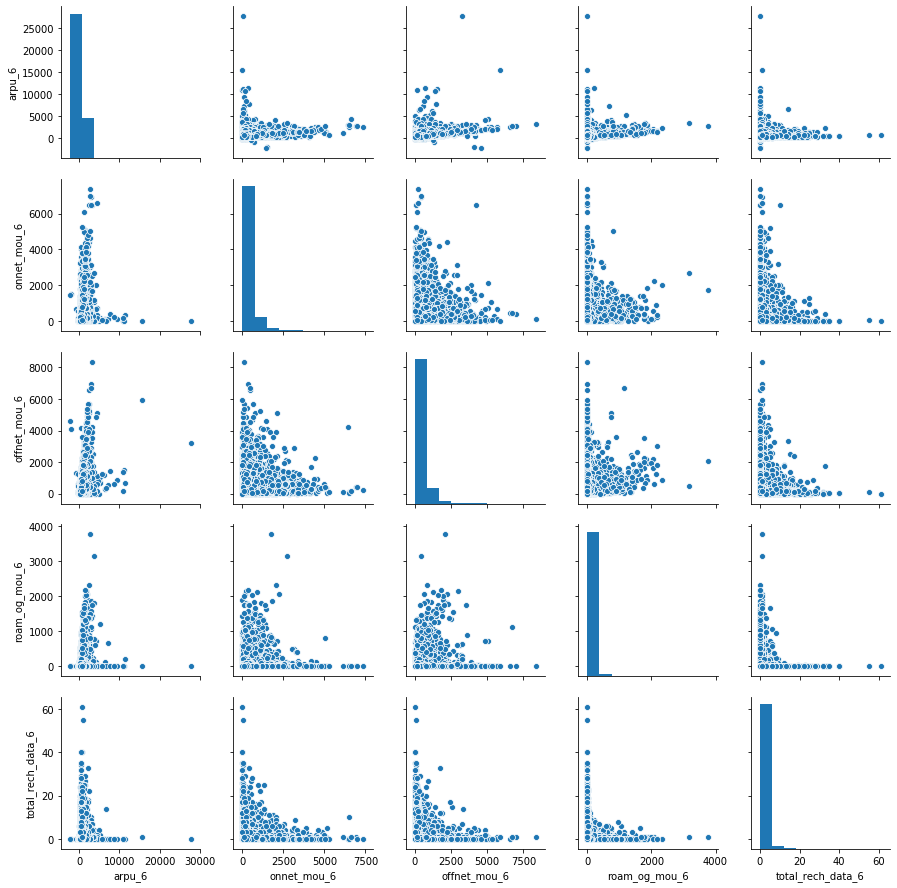

In [37]:
sns.pairplot(telecomdata, vars=["arpu_6", "onnet_mou_6", 'offnet_mou_6', 'roam_og_mou_6', 'total_rech_data_6'])
plt.show()

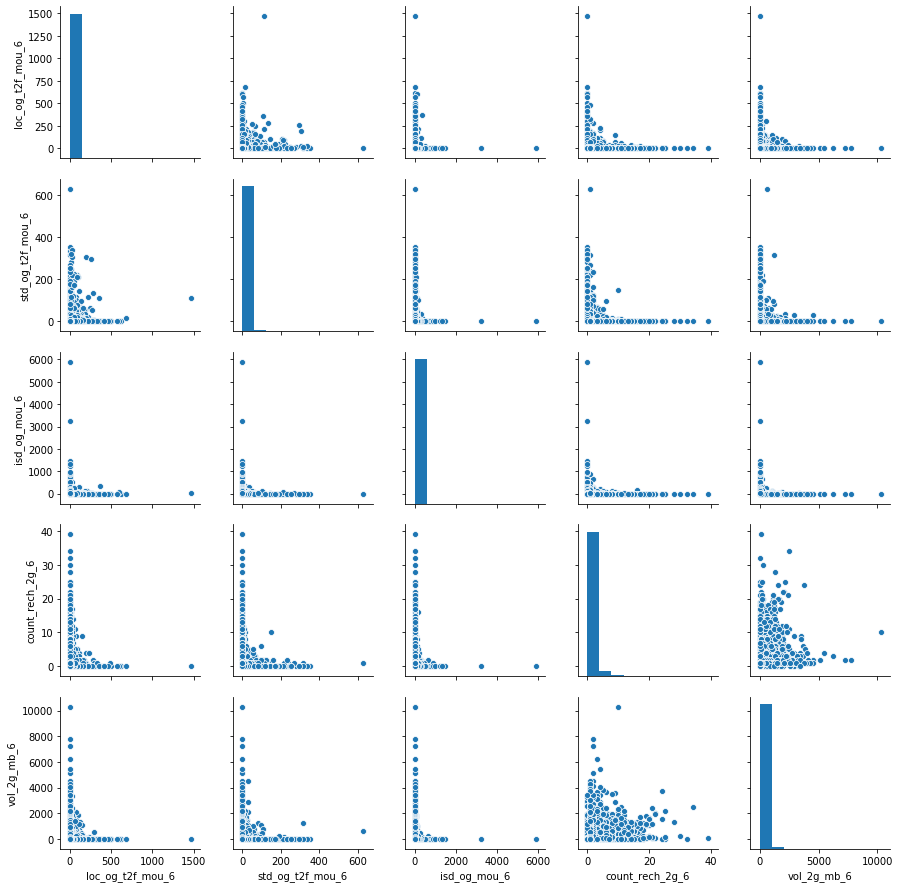

In [38]:
sns.pairplot(telecomdata, vars=["loc_og_t2f_mou_6", "std_og_t2f_mou_6", 'isd_og_mou_6', 'count_rech_2g_6', 'vol_2g_mb_6'])
plt.show()

### Outlier Treatment

In [631]:
#Capping values for each column at 5th percentile (lower bound) and 95th percentile (upper bound)  
for col in telecomdata.columns:
    percentiles = telecomdata[col].quantile([0.05,0.95]).values
    telecomdata[col][telecomdata[col] <= percentiles[0]] = percentiles[0]
    telecomdata[col][telecomdata[col] >= percentiles[1]] = percentiles[1]

C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\GitaManian\Anaconda3\lib\site-packages\ipyke

C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\GitaManian\Anaconda3\lib\site-packages\ipyke

### Dummification of categorical object variables

In [632]:
telecomdata.select_dtypes('object').head()

,mobile_number,fb_user_6,fb_user_7,fb_user_8
6,7001051193,0,0,0
7,7000701601,0,0,0
8,7001524846,0,1,1
13,7002191713,0,0,1
16,7000875565,0,0,0


In [633]:
dummyfbuser6 = pd.get_dummies(telecomdata['fb_user_6'], prefix='fbuser6')

In [634]:
dummyfbuser6.head()

,fbuser6_0.0,fbuser6_1.0
6,1,0
7,1,0
8,1,0
13,1,0
16,1,0


In [635]:
dummyfbuser6.drop(columns = ['fbuser6_0.0'], axis = 1, inplace = True)

In [636]:
telecomdata = pd.concat([telecomdata, dummyfbuser6], axis = 1)

In [637]:
dummyfbuser7 = pd.get_dummies(telecomdata['fb_user_7'], prefix='fbuser7')
dummyfbuser7.drop(columns = ['fbuser7_0.0'], axis = 1, inplace = True)
telecomdata = pd.concat([telecomdata, dummyfbuser7], axis = 1)
dummyfbuser8 = pd.get_dummies(telecomdata['fb_user_8'], prefix='fbuser8')
dummyfbuser8.drop(columns = ['fbuser8_0.0'], axis = 1, inplace = True)
telecomdata = pd.concat([telecomdata, dummyfbuser8], axis = 1)

In [638]:
telecomdata.drop(columns =['fb_user_6', 'fb_user_7', 'fb_user_8'], axis =1, inplace = True)

In [639]:
telecomdata.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,fbuser6_1.0,fbuser7_1.0,fbuser8_1.0
6,7001051193,429.023,190.7040,255.11400,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.0000,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.0000,0.0000,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,243.99,231.85,223.91,248.64,336.96,265.28,20.2400,22.69,2.51,771.5825,758.715,743.96,0.0000,0.0000,0.0000,1.390,0.7600,2.6000,0.00,0.0000,0.00,1.39,0.76,2.6000,932.84,914.565,897.07,0.00,0.0,0.0,0.00,0.00,0.000,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,37,24,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673.0,0.00,0.0000,0.00,0,0,0,0
7,7000701601,1069.180,1228.9215,1218.76225,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.4900,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,32.91,31.6425,29.2475,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,6.98,6.29,60.86,75.14,77.84,0.0,0.18,0.35,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.5775,73.38,39.53,427.8800,355.230,188.04,36.8900,11.8300,30.3900,91.440,122.8525,113.3025,12.01,11.5175,10.26,180.54,173.08,179.3175,626.46,558.040,428.74,0.21,0.0,0.0,2.06,14.53,31.590,3.59,4.33,3.66,5,5,7,1479,790,1444,500,400,400,0,0,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802.0,57.74,19.3800,18.74,1,0,0,0
8,7001524846,378.721,492.2230,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.0000,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0000,0.0000,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.0000,0.00,0.00,81.4300,23.830

In [640]:
telecomdata.reset_index(drop = True, inplace = True)

### Train Test Split and Scaling - Interpretable model (Logistic Regresion with RFE)

In [641]:
from sklearn.model_selection import train_test_split

In [642]:
telecomdata_logistic = telecomdata.copy() #Making a copy of the dataframe to use for logistic regression

In [643]:
X = telecomdata_logistic.drop(['Churn','mobile_number'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,fbuser6_1.0,fbuser7_1.0,fbuser8_1.0
0,429.023,190.7040,255.11400,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.0000,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.0000,0.0000,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,243.99,231.85,223.91,248.64,336.96,265.28,20.2400,22.69,2.51,771.5825,758.715,743.96,0.0000,0.0000,0.0000,1.390,0.7600,2.6000,0.00,0.0000,0.00,1.39,0.76,2.6000,932.84,914.565,897.07,0.00,0.0,0.0,0.00,0.00,0.000,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,37,24,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673.0,0.00,0.0000,0.00,0,0,0
1,1069.180,1228.9215,1218.76225,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.4900,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,32.91,31.6425,29.2475,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,6.98,6.29,60.86,75.14,77.84,0.0,0.18,0.35,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.5775,73.38,39.53,427.8800,355.230,188.04,36.8900,11.8300,30.3900,91.440,122.8525,113.3025,12.01,11.5175,10.26,180.54,173.08,179.3175,626.46,558.040,428.74,0.21,0.0,0.0,2.06,14.53,31.590,3.59,4.33,3.66,5,5,7,1479,790,1444,500,400,400,0,0,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802.0,57.74,19.3800,18.74,0,0,0
2,378.721,492.2230,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.0000,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0000,0.0000,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.0000,0.00,0.00,81.4300,23.830,15.79,0.0000,0.5800,0.1000,22.430,4.0800,0.6500,0.00,0.0

In [644]:
y = telecomdata_logistic['Churn']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int32

In [645]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [646]:
from sklearn.preprocessing import MinMaxScaler

In [647]:
#Scaling only numeric features, not including fbuser6, fbuser7, fbuser8, churn, and mobile_number
scaler = MinMaxScaler()

X_train[['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',                
'roam_og_mou_6',        
'roam_og_mou_7',        
'roam_og_mou_8',      
'loc_og_t2t_mou_6',      
'loc_og_t2t_mou_7',      
'loc_og_t2t_mou_8',     
'loc_og_t2m_mou_6',     
'loc_og_t2m_mou_7',      
'loc_og_t2m_mou_8',     
'loc_og_t2f_mou_6',     
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',     
'loc_og_t2c_mou_6',     
'loc_og_t2c_mou_7',     
'loc_og_t2c_mou_8',      
'loc_og_mou_6',         
'loc_og_mou_7',         
'loc_og_mou_8',         
'std_og_t2t_mou_6',    
'std_og_t2t_mou_7',      
'std_og_t2t_mou_8',      
'std_og_t2m_mou_6',      
'std_og_t2m_mou_7',     
'std_og_t2m_mou_8',     
'std_og_t2f_mou_6',    
'std_og_t2f_mou_7',   
'std_og_t2f_mou_8',      
'std_og_mou_6',     
'std_og_mou_7',        
'std_og_mou_8',       
'isd_og_mou_6',      
'isd_og_mou_7',          
'isd_og_mou_8',         
'spl_og_mou_6',         
'spl_og_mou_7',         
'spl_og_mou_8',         
'og_others_6',         
'og_others_7',           
'og_others_8',          
'total_og_mou_6',     
'total_og_mou_7',        
'total_og_mou_8',       
'loc_ic_t2t_mou_6',   
'loc_ic_t2t_mou_7',      
'loc_ic_t2t_mou_8',     
'loc_ic_t2m_mou_6',      
'loc_ic_t2m_mou_7',     
'loc_ic_t2m_mou_8',      
'loc_ic_t2f_mou_6',     
'loc_ic_t2f_mou_7',     
'loc_ic_t2f_mou_8',     
'loc_ic_mou_6',     
'loc_ic_mou_7',          
'loc_ic_mou_8',          
'std_ic_t2t_mou_6',     
'std_ic_t2t_mou_7',     
'std_ic_t2t_mou_8',     
'std_ic_t2m_mou_6',    
'std_ic_t2m_mou_7',      
'std_ic_t2m_mou_8',     
'std_ic_t2f_mou_6',     
'std_ic_t2f_mou_7',      
'std_ic_t2f_mou_8',     
'std_ic_mou_6',   
'std_ic_mou_7',         
'std_ic_mou_8',         
'total_ic_mou_6',       
'total_ic_mou_7',   
'total_ic_mou_8',        
'spl_ic_mou_6',         
'spl_ic_mou_7',       
'spl_ic_mou_8',          
'isd_ic_mou_6',     
'isd_ic_mou_7',        
'isd_ic_mou_8',          
'ic_others_6',          
'ic_others_7',           
'ic_others_8',
'total_rech_data_6',     
'total_rech_data_7',     
'total_rech_data_8',    
'max_rech_data_6',      
'max_rech_data_7',       
'max_rech_data_8',     
'count_rech_2g_6',      
'count_rech_2g_7',      
'count_rech_2g_8',      
'count_rech_3g_6',      
'count_rech_3g_7',       
'count_rech_3g_8',      
'av_rech_amt_data_6',  
'av_rech_amt_data_7',    
'av_rech_amt_data_8',    
'vol_2g_mb_6',          
'vol_2g_mb_7',         
'vol_2g_mb_8',           
'vol_3g_mb_6',         
'vol_3g_mb_7',           
'vol_3g_mb_8',          
'aug_vbc_3g',          
'jul_vbc_3g',          
'jun_vbc_3g', 
'total_rech_num_6', 
'total_rech_num_7',
'total_rech_num_8', 
'total_rech_amt_6',
'total_rech_amt_7', 'total_rech_amt_8',
'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
'aon']] = scaler.fit_transform(X_train[['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',                
'roam_og_mou_6',        
'roam_og_mou_7',        
'roam_og_mou_8',      
'loc_og_t2t_mou_6',      
'loc_og_t2t_mou_7',      
'loc_og_t2t_mou_8',     
'loc_og_t2m_mou_6',     
'loc_og_t2m_mou_7',      
'loc_og_t2m_mou_8',     
'loc_og_t2f_mou_6',     
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',     
'loc_og_t2c_mou_6',     
'loc_og_t2c_mou_7',     
'loc_og_t2c_mou_8',      
'loc_og_mou_6',         
'loc_og_mou_7',         
'loc_og_mou_8',         
'std_og_t2t_mou_6',    
'std_og_t2t_mou_7',      
'std_og_t2t_mou_8',      
'std_og_t2m_mou_6',      
'std_og_t2m_mou_7',     
'std_og_t2m_mou_8',     
'std_og_t2f_mou_6',    
'std_og_t2f_mou_7',   
'std_og_t2f_mou_8',      
'std_og_mou_6',     
'std_og_mou_7',        
'std_og_mou_8',       
'isd_og_mou_6',      
'isd_og_mou_7',          
'isd_og_mou_8',         
'spl_og_mou_6',         
'spl_og_mou_7',         
'spl_og_mou_8',         
'og_others_6',         
'og_others_7',           
'og_others_8',          
'total_og_mou_6',     
'total_og_mou_7',        
'total_og_mou_8',       
'loc_ic_t2t_mou_6',   
'loc_ic_t2t_mou_7',      
'loc_ic_t2t_mou_8',     
'loc_ic_t2m_mou_6',      
'loc_ic_t2m_mou_7',     
'loc_ic_t2m_mou_8',      
'loc_ic_t2f_mou_6',     
'loc_ic_t2f_mou_7',     
'loc_ic_t2f_mou_8',     
'loc_ic_mou_6',     
'loc_ic_mou_7',          
'loc_ic_mou_8',          
'std_ic_t2t_mou_6',     
'std_ic_t2t_mou_7',     
'std_ic_t2t_mou_8',     
'std_ic_t2m_mou_6',    
'std_ic_t2m_mou_7',      
'std_ic_t2m_mou_8',     
'std_ic_t2f_mou_6',     
'std_ic_t2f_mou_7',      
'std_ic_t2f_mou_8',     
'std_ic_mou_6',   
'std_ic_mou_7',         
'std_ic_mou_8',         
'total_ic_mou_6',       
'total_ic_mou_7',   
'total_ic_mou_8',        
'spl_ic_mou_6',         
'spl_ic_mou_7',       
'spl_ic_mou_8',          
'isd_ic_mou_6',     
'isd_ic_mou_7',        
'isd_ic_mou_8',          
'ic_others_6',          
'ic_others_7',           
'ic_others_8',
'total_rech_data_6',     
'total_rech_data_7',     
'total_rech_data_8',    
'max_rech_data_6',      
'max_rech_data_7',       
'max_rech_data_8',     
'count_rech_2g_6',      
'count_rech_2g_7',      
'count_rech_2g_8',      
'count_rech_3g_6',      
'count_rech_3g_7',       
'count_rech_3g_8',      
'av_rech_amt_data_6',  
'av_rech_amt_data_7',    
'av_rech_amt_data_8',    
'vol_2g_mb_6',          
'vol_2g_mb_7',         
'vol_2g_mb_8',           
'vol_3g_mb_6',         
'vol_3g_mb_7',           
'vol_3g_mb_8',          
'aug_vbc_3g',          
'jul_vbc_3g',          
'jun_vbc_3g', 
'total_rech_num_6', 
'total_rech_num_7',
'total_rech_num_8', 
'total_rech_amt_6',
'total_rech_amt_7', 'total_rech_amt_8',
'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
'aon']])

X_train.head()

C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\GitaManian\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,fbuser6_1.0,fbuser7_1.0,fbuser8_1.0
18454,0.366513,0.393177,0.437017,0.746782,1.000000,0.220358,0.394046,0.250634,0.287710,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.734468,0.796615,0.453944,0.555174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.631933,0.000000,0.000000,0.000000,0.026440,0.040292,0.009812,0.0,0.0,0.0,0.016518,0.024145,0.005578,0.0,0.000000,0.0,0.145291,0.00000,0.000000,0.0,0.0,0.0,0.715348,1.000000,0.311432,1.000000,1.000000,1.000000,1.000000,0.481643,0.815356,1.000000,0.715181,0.415548,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.077736,0.018803,0.432118,1.0,0.831778,1.0,0.116170,0.061824,0.444519,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.269231,0.269231,0.24,0.315789,0.379712,0.428670,0.231111,0.3850,0.5375,0.166667,0.198413,0.198413,0.50,0.2,0.2,0.611111,0.611111,0.611111,0.666667,0.25,0.25,0.0,0.0,0.0,0.676923,0.377914,0.380247,0.260693,0.345426,0.629276,0.791821,0.173991,0.274174,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.819776,0.793891,0.497244,1.000000,1,1,1
25725,0.261104,0.123403,0.390952,0.325415,0.134066,0.257860,0.187481,0.159536,0.360668,0.0,0.0,0.0,0.0,0.0,0.0,0.241311,0.086567,0.407655,0.335485,0.271044,0.593072,0.025220,0.000000,0.000000,0.016704,1.000000,0.000000,0.311560,0.210283,0.539488,0.296624,0.128623,0.164590,0.040785,0.025067,0.086787,0.0,0.0,0.0,0.214276,0.095027,0.150317,0.0,0.507692,0.0,0.571839,0.40308,0.000000,0.0,0.0,0.0,0.318993,0.182063,0.379694,0.295135,0.172870,0.348086,0.558547,0.455765,0.626425,0.016258,0.051785,0.047742,0.472138,0.360781,0.534048,1.000000,0.577528,0.954411,0.419361,0.483751,0.304142,0.0,0.000000,0.0,0.642909,0.494696,0.493148,0.580141,0.421107,0.607244,0.704545,0.0,1.0,1.0,0.352431,1.0,0.000000,0.000000,0.016393,0.423077,0.346154,0.56,0.247461,0.140507,0.378809,0.133333,0.1625,0.2500,0.223333,0.079365,0.000000,0.75,1.0,0.8,0.091270,0.091270,0.091270,1.000000,1.

In [648]:
#Initially, churn = 1 is in only about 11% of the overall number of rows in the dataset
Data_Imbalance = (sum(telecomdata_logistic['Churn'])/len(telecomdata_logistic['Churn'].index))*100
Data_Imbalance

10.746358012372779

In [649]:
X_train.corr().shape

(142, 142)

In [650]:
corr_matrix = X_train.corr().abs()

In [651]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [652]:
#Dropping features with correlation greater than 0.60
drop_feature = [column for column in upper.columns if any(upper[column] > 0.60)]

In [653]:
X_train.drop(drop_feature, axis=1, inplace=True)

C:\Users\GitaManian\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [654]:
drop_feature

['arpu_7',
 'arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 '

In [655]:
X_train.corr().shape

(52, 52)

In [656]:
X_train.corr()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,og_others_8,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,max_rech_data_6,vol_2g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon
arpu_6,1.000000,0.324743,0.490126,0.105026,0.109064,0.120637,0.209262,0.290108,0.128985,0.067476,0.057393,0.041917,0.051707,0.053115,0.047137,0.134667,0.102553,0.109639,0.130594,0.108650,0.116646,NaN,NaN,0.068234,0.154621,0.140216,0.053276,0.042601,0.036198,0.006246,NaN,-0.021035,0.095222,0.067430,0.067290,0.049792,0.360650,0.212627,0.267561,0.141849,0.181690,0.141526,0.107601,0.161980,0.045470,0.000993,0.009053,0.002242,0.034262,0.034059,0.029208,-0.014775
onnet_mou_6,0.324743,1.000000,-0.044166,-0.016446,0.046988,0.067816,0.280794,-0.100755,-0.118631,0.062005,0.056690,0.047993,-0.080205,-0.078814,-0.075639,-0.074698,-0.065634,-0.059636,0.097920,0.105695,0.091761,NaN,NaN,-0.097246,0.245685,0.000542,-0.067461,-0.079450,-0.076172,0.025673,NaN,-0.020909,-0.037981,0.000727,-0.009498,-0.024258,0.229861,-0.138904,-0.052631,-0.073228,-0.012248,-0.053667,-0.153208,-0.200280,-0.118451,-0.119765,-0.096277,-0.096268,-0.073278,-0.058396,-0.043389,-0.102280
offnet_mou_6,0.490126,-0.044166,1.000000,0.009801,0.060960,0.064067,0.090806,0.417291,0.069374,0.049303,0.048378,0.041459,0.043072,0.036345,0.033563,-0.007704,-0.006179,-0.000853,0.108392,0.086264,0.075584,NaN,NaN,0.032080,0.013460,0.236178,0.025091,0.022455,0.013355,0.012333,NaN,0.067752,0.039455,0.068348,0.077854,0.056189,0.225954,-0.036916,0.057551,0.011956,0.070978,0.014278,-0.142915,-0.179777,-0.113242,-0.107328,-0.080024,-0.079246,-0.083924,-0.063360,-0.054688,-0.047820
roam_ic_mou_6,0.105026,-0.016446,0.009801,1.000000,0.432833,0.310570,-0.077824,-0.111187,-0.038118,-0.016846,-0.000487,0.005714,0.021673,0.029987,0.041272,-0.015034,0.000971,0.000082,-0.081405,-0.036100,-0.099965,NaN,NaN,-0.058699,0.068453,0.063683,0.010803,0.030386,0.039246,-0.070541,NaN,0.008942,-0.017593,-0.020639,0.003771,0.013916,-0.062922,0.089127,0.073814,0.051669,0.067595,0.043933,-0.020906,0.001533,0.022539,-0.009799,-0.004153,-0.007916,-0.011283,-0.006380,0.004306,0.044040
roam_ic_mou_7,0.109064,0.046988,0.060960,0.432833,1.000000,0.486598,-0.025308,-0.053132,-0.002271,0.007163,-0.006807,0.001398,0.050873,0.030089,0.039672,-0.008807,-0.009842,0.002702,-0.030976,-0.058046,-0.047945,NaN,NaN,-0.025162,0.122164,0.114003,0.029899,0.017236,0.017861,-0.014757,NaN,-0.007085,0.009275,-0.000482,-0.021295,-0.011262,-0.030631,0.064780,0.095556,0.059845,0.058973,0.008560,-0.010094,-0.007009,0.002768,-0.006831,-0.005661,-0.007098,-0.012302,-0.004724,-0.001126,0.012811
roam_ic_mou_8,0.120637,0.067816,0.064067,0.310570,0.486598,1.000000,-0.005928,-0.032866,0.016036,0.000843,0.008380,0.002360,0.040298,0.041050,0.035965,0.014366,0.021901,0.010612,-0.017588,-0.020371,-0.045008,NaN,NaN,-0.003283,0.141087,0.126792,0.041794,0.036607,0.018373,-0.017389,NaN,-0.039870,0.033015,0.029680,0.017400,-0.014688,-0.030085,0.072481,0.108362,0.043213,0.080210,0.041997,0.000251,0.011564,0.015220,-0.004977,0.004740,0.004923,-0.011381,0.007168,-0.003346,0.015719
loc_og_t2t_mou_6,0.209262,0.280794,0.090806,-0.077824,-0.025308,-0.005928,1.000000,0.408144,0.181899,0.014765,0.001791,0.036293,0.067369,0.074203,0.076506,0.004642,0.014925,0.019430,0.010130,0.009670,0.023912,NaN,NaN,0.188375,-0.034249,-0.005150,0.116673,0.106149,0.116781,0.048561,NaN,-0.061659,0.019157,0.044851,0.048351,0.053843,0.003379,0.069081,0.

In [657]:
from sklearn.linear_model import LogisticRegression

(Use sklearn's logistic regression model with class weight = balanced. This will be the interpretable model. Have to apply RFE also to this. I suggest RFE with 15 variables.)

After this, have to build three high performance models which use Principal Component analysis initially. I suggest tree / random forest, one boosting based model, and one regularized regression model with lasso / ridge.

All the pre-work prior to running the model is finished, except for EDA. Hopefully, running the models now will take less time.
Will continue the coding at my end also once I finish office work today.

In [658]:
logreg = LogisticRegression(solver = 'lbfgs', C = 1e9, class_weight = 'balanced', random_state = 100)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [659]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10) 
rfe = rfe.fit(X_train,y_train)

In [660]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('onnet_mou_6', False, 37),
 ('offnet_mou_6', False, 24),
 ('roam_ic_mou_6', False, 38),
 ('roam_ic_mou_7', False, 12),
 ('roam_ic_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 6),
 ('loc_og_t2m_mou_6', False, 2),
 ('loc_og_t2f_mou_6', False, 40),
 ('loc_og_t2c_mou_6', False, 39),
 ('loc_og_t2c_mou_7', False, 21),
 ('loc_og_t2c_mou_8', False, 5),
 ('std_og_t2f_mou_6', False, 35),
 ('std_og_t2f_mou_7', False, 16),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_6', False, 29),
 ('isd_og_mou_7', False, 11),
 ('isd_og_mou_8', False, 13),
 ('spl_og_mou_6', False, 19),
 ('spl_og_mou_7', False, 20),
 ('og_others_6', False, 25),
 ('og_others_7', False, 42),
 ('og_others_8', False, 43),
 ('loc_ic_t2f_mou_6', False, 17),
 ('std_ic_t2t_mou_6', False, 31),
 ('std_ic_t2m_mou_6', False, 32),
 ('std_ic_t2f_mou_6', False, 8),
 ('std_ic_t2f_mou_7', False, 18),
 ('std_ic_t2f_mou_8', True, 1),
 ('spl_ic_mou_6', False, 26),
 ('spl_ic_mou_7', False, 41),
 ('spl_ic_mou_8', True, 1),
 

In [661]:
X_train.columns[rfe.support_]

Index(['arpu_6', 'roam_ic_mou_8', 'std_og_t2f_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'ic_others_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_3g_8', 'aon'],
      dtype='object')

In [662]:
colRFE = X_train.columns[rfe.support_]

In [663]:
X_train.columns[~rfe.support_]

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'ic_others_6',
       'ic_others_7', 'total_rech_num_6', 'max_rech_amt_6', 'max_rech_amt_7',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'total_rech_data_6',
       'max_rech_data_6', 'vol_2g_mb_6', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_3g_6', 'sachet_3g_7'],
      dtype='object')

In [664]:
X_train[colRFE].shape

(21046, 10)

In [665]:
y_train.shape

(21046,)

In [666]:
logRFE = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', C = 1e9, random_state = 100)
logRFE.fit(X_train[colRFE], y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [667]:
print(logRFE.intercept_)
print(logRFE.coef_)

[0.97901028]
[[ 0.94035714  1.56814011 -1.32413957 -2.07809234 -3.00030195 -1.6126432
  -3.69443258 -1.78139624 -1.44438278 -1.34821415]]


In [668]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [669]:
vif = pd.DataFrame()
vif['Features'] = X_train[colRFE].columns
vif['VIF'] = [variance_inflation_factor(X_train[colRFE].values, i) for i in range(X_train[colRFE].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,last_day_rch_amt_8,2.01
9,aon,1.85
0,arpu_6,1.81
3,std_ic_t2f_mou_8,1.39
2,std_og_t2f_mou_8,1.32
5,ic_others_8,1.16
1,roam_ic_mou_8,1.13
7,monthly_2g_8,1.12
4,spl_ic_mou_8,1.06
8,sachet_3g_8,1.05


In [670]:
X_test.shape

(9020, 142)

In [671]:
y_test.shape

(9020,)

In [672]:
X_test.drop(columns = ['arpu_7',
 'arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'fbuser6_1.0',
 'fbuser7_1.0',
 'fbuser8_1.0'], axis = 1, inplace = True)

C:\Users\GitaManian\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [673]:
X_test.shape

(9020, 52)

In [674]:
X_test.drop(columns = ['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'ic_others_6',
       'ic_others_7', 'total_rech_num_6', 'max_rech_amt_6', 'max_rech_amt_7',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'total_rech_data_6',
       'max_rech_data_6', 'vol_2g_mb_6', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_3g_6', 'sachet_3g_7'], axis = 1, inplace = True)

In [675]:
X_test

,arpu_6,roam_ic_mou_8,std_og_t2f_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,ic_others_8,last_day_rch_amt_8,monthly_2g_8,sachet_3g_8,aon
3214,822.21000,33.74,0.00,1.20,0.00,0.00,130,0,0,1287.00
21226,961.05900,5.73,0.00,0.00,0.00,0.00,30,0,0,776.00
26797,628.91000,6.56,0.00,0.00,0.00,0.00,0,0,0,625.00
20766,553.27800,56.16,0.00,0.00,0.00,0.00,0,0,0,364.00
15705,721.02400,0.00,0.00,1.43,0.00,0.00,77,0,0,2157.00
12958,886.75100,0.00,0.00,0.00,0.00,0.00,30,0,0,657.00
21595,548.46200,0.00,6.29,10.26,0.00,0.15,252,0,0,3014.00
13849,427.93400,0.00,0.00,0.00,0.00,3.20,252,0,0,394.00
25921,689.14300,0.00,0.00,0.00,0.00,3.66,130,0,0,3107.00
25100,431.99500,0.00,0.00,0.00,0.21,0.00,0,0,0,479.00


In [676]:
y_test.shape

(9020,)

In [677]:
X_test[['arpu_6', 'roam_ic_mou_8', 'std_og_t2f_mou_8', 'std_ic_t2f_mou_8',
'spl_ic_mou_8', 'ic_others_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_3g_8',
'aon']] = scaler.fit_transform(X_test[['arpu_6', 'roam_ic_mou_8', 'std_og_t2f_mou_8', 'std_ic_t2f_mou_8',
'spl_ic_mou_8', 'ic_others_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_3g_8',
'aon']])

C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\GitaManian\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [678]:
X_test

,arpu_6,roam_ic_mou_8,std_og_t2f_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,ic_others_8,last_day_rch_amt_8,monthly_2g_8,sachet_3g_8,aon
3214,0.560974,0.600783,0.000000,0.116959,0.00,0.000000,0.515873,0.0,0.0,0.361646
21226,0.707149,0.102030,0.000000,0.000000,0.00,0.000000,0.119048,0.0,0.0,0.186810
26797,0.357475,0.116809,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.135147
20766,0.277853,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.045847
15705,0.454449,0.000000,0.000000,0.139376,0.00,0.000000,0.305556,0.0,0.0,0.659311
12958,0.628920,0.000000,0.000000,0.000000,0.00,0.000000,0.119048,0.0,0.0,0.146095
21595,0.272783,0.000000,1.000000,1.000000,0.00,0.040984,1.000000,0.0,0.0,0.952528
13849,0.145896,0.000000,0.000000,0.000000,0.00,0.874317,1.000000,0.0,0.0,0.056112
25921,0.420886,0.000000,0.000000,0.000000,0.00,1.000000,0.515873,0.0,0.0,0.984347
25100,0.150171,0.000000,0.000000,0.000000,0.84,0.000000,0.000000,0.0,0.0,0.085194


In [679]:
X_train[colRFE].describe()

,arpu_6,roam_ic_mou_8,std_og_t2f_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,ic_others_8,last_day_rch_amt_8,monthly_2g_8,sachet_3g_8,aon
count,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000
mean,0.307210,0.087381,0.077890,0.098552,0.070689,0.094390,0.308945,0.097026,0.054927,0.344950
std,0.270345,0.246572,0.240566,0.252289,0.247336,0.249388,0.318081,0.296000,0.227844,0.318630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084509
50%,0.223697,0.000000,0.000000,0.000000,0.000000,0.000000,0.198413,0.000000,0.000000,0.229236
75%,0.435856,0.000000,0.000000,0.000000,0.000000,0.000000,0.515873,0.000000,0.000000,0.566590
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [680]:
y_train_pred = logRFE.predict(X_train[colRFE])
y_train_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [681]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number
0,0,0,18454
1,0,0,25725
2,0,1,10980
3,0,0,25641
4,0,0,21756


In [682]:
y_train_pred_final['Churn_Prob'].value_counts()

0    13470
1     7576
Name: Churn_Prob, dtype: int64

In [701]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,18454,0,0,0,0,0,0,0,0,0,0,0
1,0,0,25725,0,0,0,0,0,0,0,0,0,0,0
2,0,1,10980,1,1,1,1,1,1,1,1,1,1,1
3,0,0,25641,0,0,0,0,0,0,0,0,0,0,0
4,0,0,21756,0,0,0,0,0,0,0,0,0,0,0


In [702]:
from sklearn import metrics

In [703]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[13164  5634]
 [  306  1942]]


In [704]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [705]:
TP / float(TP+FN) #Sensitivity

0.8638790035587188

In [706]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
#Drawing ROC graph

In [707]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

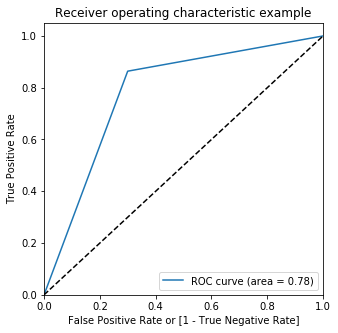

In [708]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [709]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,18454,0,0,0,0,0,0,0,0,0,0,0
1,0,0,25725,0,0,0,0,0,0,0,0,0,0,0
2,0,1,10980,1,1,1,1,1,1,1,1,1,1,1
3,0,0,25641,0,0,0,0,0,0,0,0,0,0,0
4,0,0,21756,0,0,0,0,0,0,0,0,0,0,0


In [710]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.717761  0.863879  0.700287
0.1   0.1  0.717761  0.863879  0.700287
0.2   0.2  0.717761  0.863879  0.700287
0.3   0.3  0.717761  0.863879  0.700287
0.4   0.4  0.717761  0.863879  0.700287
0.5   0.5  0.717761  0.863879  0.700287
0.6   0.6  0.717761  0.863879  0.700287
0.7   0.7  0.717761  0.863879  0.700287
0.8   0.8  0.717761  0.863879  0.700287
0.9   0.9  0.717761  0.863879  0.700287


In [711]:
y_test_pred = logRFE.predict(X_test)

In [712]:
y_test_pred[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [713]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [714]:
y_pred_1.head()

,0
0,0
1,1
2,1
3,1
4,0


In [715]:
y_test_df = pd.DataFrame(y_test)

In [716]:
y_test_df['rownumber'] = y_test_df.index

In [717]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [718]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [719]:
y_pred_final.head()

,Churn,rownumber,0
0,0,3214,0
1,1,21226,1
2,1,26797,1
3,0,20766,1
4,0,15705,0


In [720]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [721]:
y_pred_final.head()

,Churn,rownumber,Churn_Prob
0,0,3214,0
1,1,21226,1
2,1,26797,1
3,0,20766,1
4,0,15705,0


In [722]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [723]:
y_pred_final.head()

,Churn,rownumber,Churn_Prob,final_predicted
0,0,3214,0,0
1,1,21226,1,1
2,1,26797,1,1
3,0,20766,1,1
4,0,15705,0,0


In [724]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[5565, 2472],
       [ 160,  823]], dtype=int64)

In [725]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [726]:
TP / float(TP+FN) #Sensitivity

0.8372329603255341

Business Recommendation:
The company needs to examine variables such as roaming minutes of useage, the number of 2G schemes services, and whether people are taking add-on sachet packs, as these have been identified as important predictors by the model of churn.

### High Performance Models: Decision Tree and Random Forest with PCA

In [801]:
telecomdata_tree = telecomdata.copy()

In [802]:
X_tree = telecomdata_tree.drop(['Churn','mobile_number'], axis=1)
X_tree.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,fbuser6_1.0,fbuser7_1.0,fbuser8_1.0
0,429.023,190.7040,255.11400,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.0000,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.0000,0.0000,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,243.99,231.85,223.91,248.64,336.96,265.28,20.2400,22.69,2.51,771.5825,758.715,743.96,0.0000,0.0000,0.0000,1.390,0.7600,2.6000,0.00,0.0000,0.00,1.39,0.76,2.6000,932.84,914.565,897.07,0.00,0.0,0.0,0.00,0.00,0.000,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,37,24,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673.0,0.00,0.0000,0.00,0,0,0
1,1069.180,1228.9215,1218.76225,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.4900,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,32.91,31.6425,29.2475,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,6.98,6.29,60.86,75.14,77.84,0.0,0.18,0.35,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.5775,73.38,39.53,427.8800,355.230,188.04,36.8900,11.8300,30.3900,91.440,122.8525,113.3025,12.01,11.5175,10.26,180.54,173.08,179.3175,626.46,558.040,428.74,0.21,0.0,0.0,2.06,14.53,31.590,3.59,4.33,3.66,5,5,7,1479,790,1444,500,400,400,0,0,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802.0,57.74,19.3800,18.74,0,0,0
2,378.721,492.2230,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.0000,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0000,0.0000,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.0000,0.00,0.00,81.4300,23.830,15.79,0.0000,0.5800,0.1000,22.430,4.0800,0.6500,0.00,0.0

In [803]:
y_tree = telecomdata_tree['Churn']
y_tree.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int32

In [804]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, train_size=0.7, test_size=0.3, random_state=100)

In [805]:
from sklearn.decomposition import IncrementalPCA

In [806]:
from sklearn import preprocessing
X_scaler = preprocessing.MinMaxScaler().fit(X_tree_train)
y_scaler = preprocessing.MinMaxScaler().fit(y_tree_train.values.reshape(-1,1))
X_tree_train = X_scaler.transform(X_tree_train) 
y_tree_train = y_scaler.transform(y_tree_train.values.reshape(-1,1)) 

X_tree_test=X_scaler.transform(X_tree_test) 
y_tree_test = y_scaler.transform(y_tree_test.values.reshape(-1,1))

In [808]:
pca = IncrementalPCA(n_components=10)

In [809]:
X_tree_train_reduced = pca.fit_transform(X_tree_train)
X_tree_test_reduced = pca.transform(X_tree_test)

In [810]:
from sklearn.tree import DecisionTreeClassifier

In [811]:
dt_base_PCA = DecisionTreeClassifier(random_state=100)

In [812]:
dt_base_PCA.fit(X_tree_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [813]:
y_tree_train_pred = dt_base_PCA.predict(X_tree_train_reduced)
y_tree_test_pred = dt_base_PCA.predict(X_tree_test_reduced)

In [814]:
from sklearn.metrics import classification_report

In [815]:
print(classification_report(y_tree_test, y_tree_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      8037
         1.0       0.42      0.44      0.43       983

    accuracy                           0.87      9020
   macro avg       0.68      0.68      0.68      9020
weighted avg       0.88      0.87      0.87      9020



In [816]:
from sklearn.model_selection import GridSearchCV

In [817]:
dt_base_PCA = DecisionTreeClassifier(random_state=100)

In [818]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [819]:
grid_search = GridSearchCV(estimator=dt_base_PCA,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [821]:
%%time
grid_search.fit(X_tree_train_reduced, y_tree_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.3s finished


Wall time: 10.7 s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
         

In [822]:
grid_search.best_score_

0.9057778200133042

In [823]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [824]:
from sklearn.ensemble import RandomForestClassifier

In [832]:
rf = RandomForestClassifier(random_state=100, oob_score = True )

In [835]:
%%time
rf.fit(X_tree_train_reduced, y_tree_train)

C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Wall time: 768 ms


C:\Users\GitaManian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GitaManian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [836]:
rf.oob_score_

0.9013589280623396

In [837]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [838]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [840]:
%%time
grid_search.fit(X_tree_train_reduced, y_tree_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.7min finished
C:\Users\GitaManian\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 4min 48s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_de

In [841]:
grid_search.best_score_

0.9136177896037252

In [842]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)